In [ ]:
# General
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#  sklearn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Keras model components
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten
from tensorflow.keras.layers import Conv1D, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

# For text (word) to integer transformation
from tensorflow.keras.preprocessing.text import Tokenizer

# For making all integer sequences of equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import backend to invoke tensorflow commands to manipulate tensors
from tensorflow.keras import backend as K

# Plotting libraries
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline 

# Misc
import math, time, os,gc

In [ ]:
# Print all outputs from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Mounting GDrive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Path to folder in gdrive where data files are: 
pathToFolder = "/gdrive/MyDrive/FA/"

In [ ]:
#  Read dataset in pandas:
df =pd.read_excel(pathToFolder+"nyka_top_brands_cosmetics_product_reviews.xlsx")

In [ ]:
df.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...


In [ ]:
df.shape

(61284, 18)

In [ ]:
df.describe()

,product_id,review_id,review_rating,mrp,price,product_rating,product_rating_count
count,6.128300e+04,6.128300e+04,61283.000000,61283.000000,61283.000000,61283.000000,61283.000000
mean,7.983926e+05,1.485009e+07,4.414781,573.255732,462.123183,4.099132,7583.068143
std,1.281425e+06,7.383481e+06,1.062547,324.099646,264.874490,0.235946,14463.341092
min,2.500000e+02,9.600000e+01,1.000000,75.000000,45.000000,1.500000,1.000000
25%,1.604880e+05,1.102385e+07,4.000000,300.000000,262.000000,4.000000,1760.000000
50%,4.524430e+05,1.525146e+07,5.000000,599.000000,400.000000,4.100000,3925.000000
75%,7.665290e+05,2.002958e+07,5.000000,799.000000,639.000000,4.300000,8720.000000
max,7.749427e+06,2.963031e+07,5.000000,3874.000000,2947.000000,4.800000,98477.000000


In [ ]:
df.isnull().sum()

product_id                  0
brand_name                  0
review_id                   0
review_title                3
review_text                 8
author                      0
review_date                 0
review_rating               1
is_a_buyer                  0
pro_user                    0
review_label            13035
product_title               0
mrp                         0
price                       0
product_rating              0
product_rating_count        0
product_tags            47782
product_url                 0
dtype: int64

In [ ]:
df["review_text"].fillna(value="No Review", inplace=True)

In [ ]:
df["review_rating"].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [ ]:
df["review_rating"].dropna(inplace=True)

In [ ]:
df["review_label"].unique()

array(['Verified Buyer', nan, 'Verified Professional'], dtype=object)

In [ ]:
df["review_label"].fillna(value="Not Verified Buyer",inplace=True)

In [ ]:
df["product_tags"].unique()

array([nan, 'FEATURED', 'BESTSELLER', 'FEATURED, BESTSELLER', 'NEW',
       'FEATURED, NEW'], dtype=object)

In [ ]:
df["product_tags"].fillna(value="Missing",inplace=True)

In [ ]:
df.isnull().sum()

product_id              0
brand_name              0
review_id               0
review_title            3
review_text             0
author                  0
review_date             0
review_rating           1
is_a_buyer              0
pro_user                0
review_label            0
product_title           0
mrp                     0
price                   0
product_rating          0
product_rating_count    0
product_tags            0
product_url             0
dtype: int64

In [ ]:
df["review_title"].unique()

array(['Worth buying 50g one', 'Best cream to start ur day',
       'perfect for summers dry for winters', ...,
       'Natural Chemical free Shampoo', 'It is a good one!',
       'Really mild and nice'], dtype=object)

In [ ]:
df["review_title"].fillna(value="Missing",inplace=True)

In [ ]:

df["review_rating"].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [ ]:
df["review_rating"].dropna(axis=0)

0        5.0
1        5.0
2        4.0
3        3.0
4        2.0
        ... 
61279    5.0
61280    5.0
61281    5.0
61282    5.0
61283    2.0
Name: review_rating, Length: 61283, dtype: float64

In [ ]:
df["review_rating"].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [ ]:
df.isnull().sum()

product_id              0
brand_name              0
review_id               0
review_title            0
review_text             0
author                  0
review_date             0
review_rating           1
is_a_buyer              0
pro_user                0
review_label            0
product_title           0
mrp                     0
price                   0
product_rating          0
product_rating_count    0
product_tags            0
product_url             0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

product_id              0
brand_name              0
review_id               0
review_title            0
review_text             0
author                  0
review_date             0
review_rating           0
is_a_buyer              0
pro_user                0
review_label            0
product_title           0
mrp                     0
price                   0
product_rating          0
product_rating_count    0
product_tags            0
product_url             0
dtype: int64

In [ ]:
df["review_rating"].unique()

array([5., 4., 3., 2., 1.])

In [ ]:
df.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...


<Figure size 576x720 with 0 Axes>

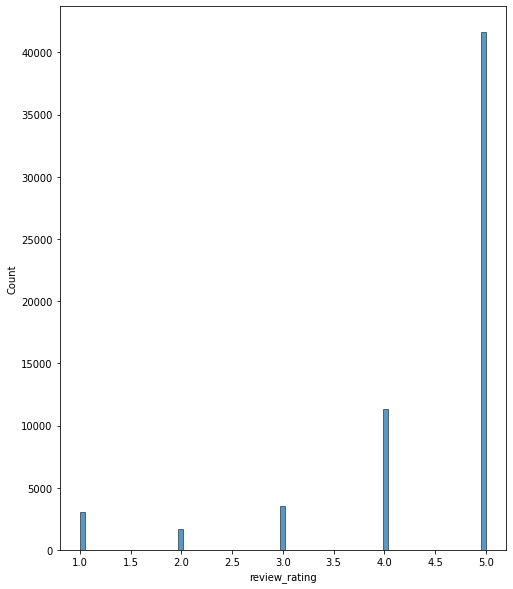

In [ ]:
plt.figure(figsize=(8,10))
sns.histplot(df['review_rating'])

This plot explains clearly that 5 star rating was given by most users.

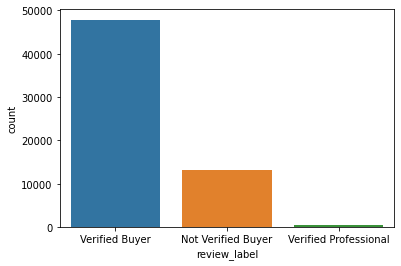

In [ ]:
sns.countplot(x='review_label', data=df)

Out of the reviews given by the users most are verified buyers of the product and least are the verified professionals.

<Figure size 1800x1440 with 0 Axes>

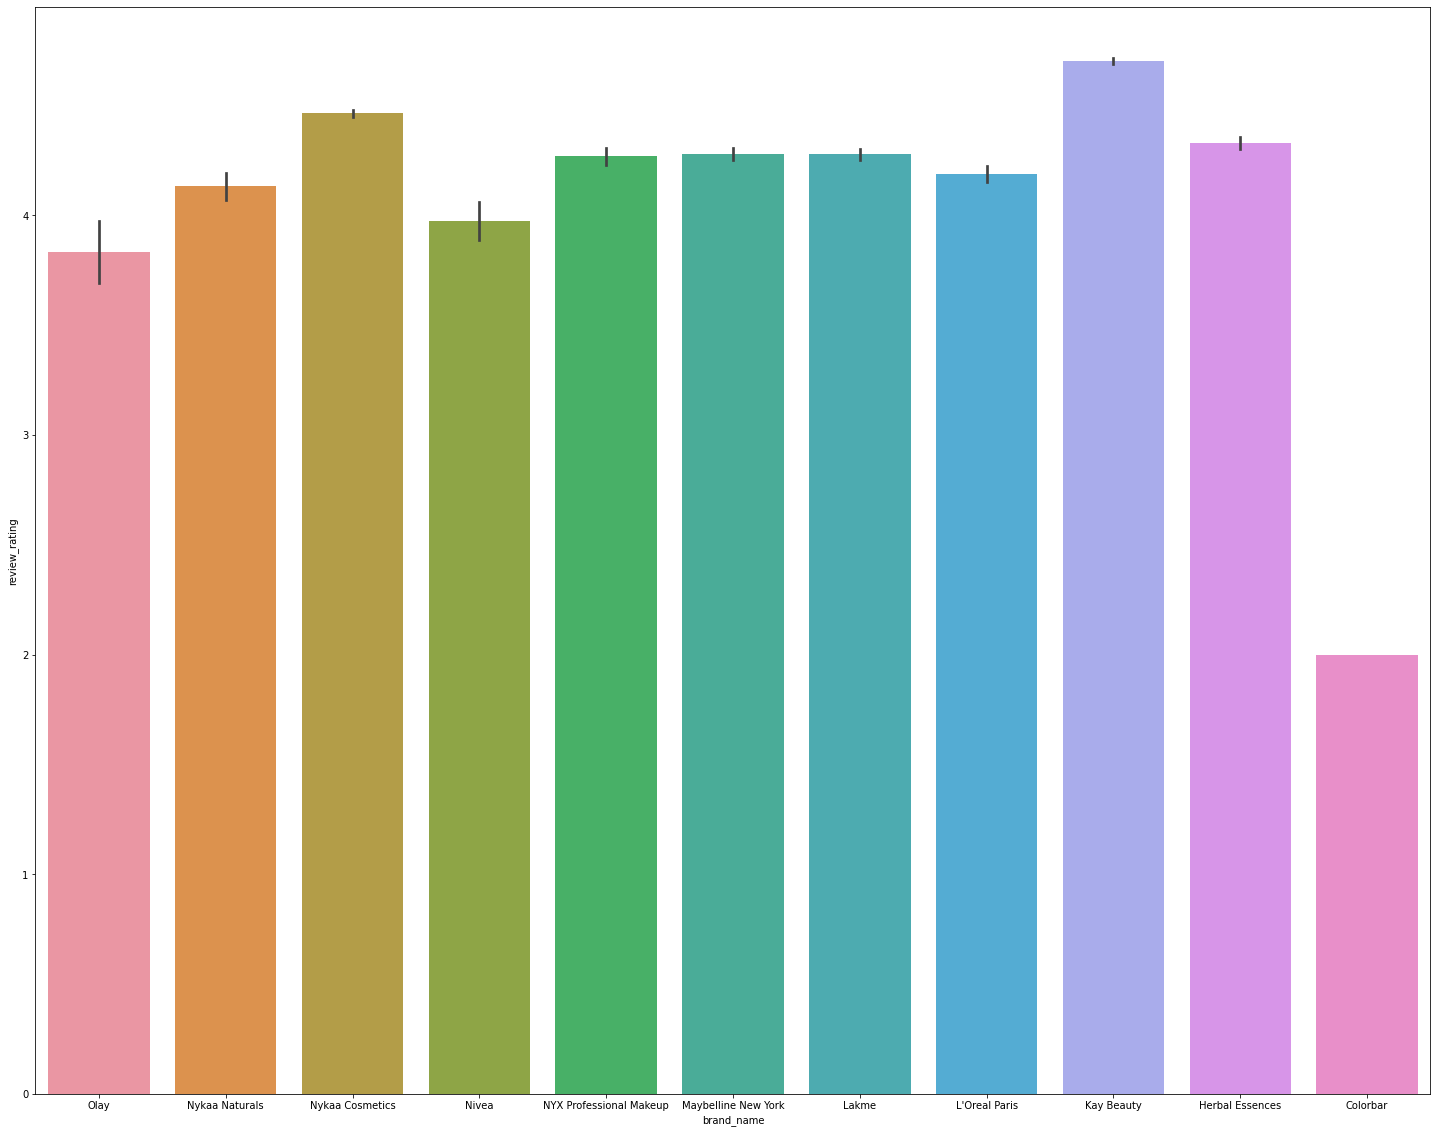

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='brand_name',y='review_rating', data=df)


Maximum review rating is given to the brand Kay Beauty

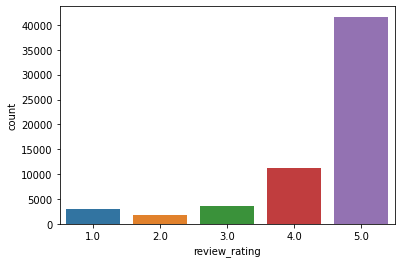

In [ ]:
sns.countplot(x='review_rating', data=df)

This shows that users have given 5 star rating the most while reviewing the products.


<Figure size 1800x1440 with 0 Axes>

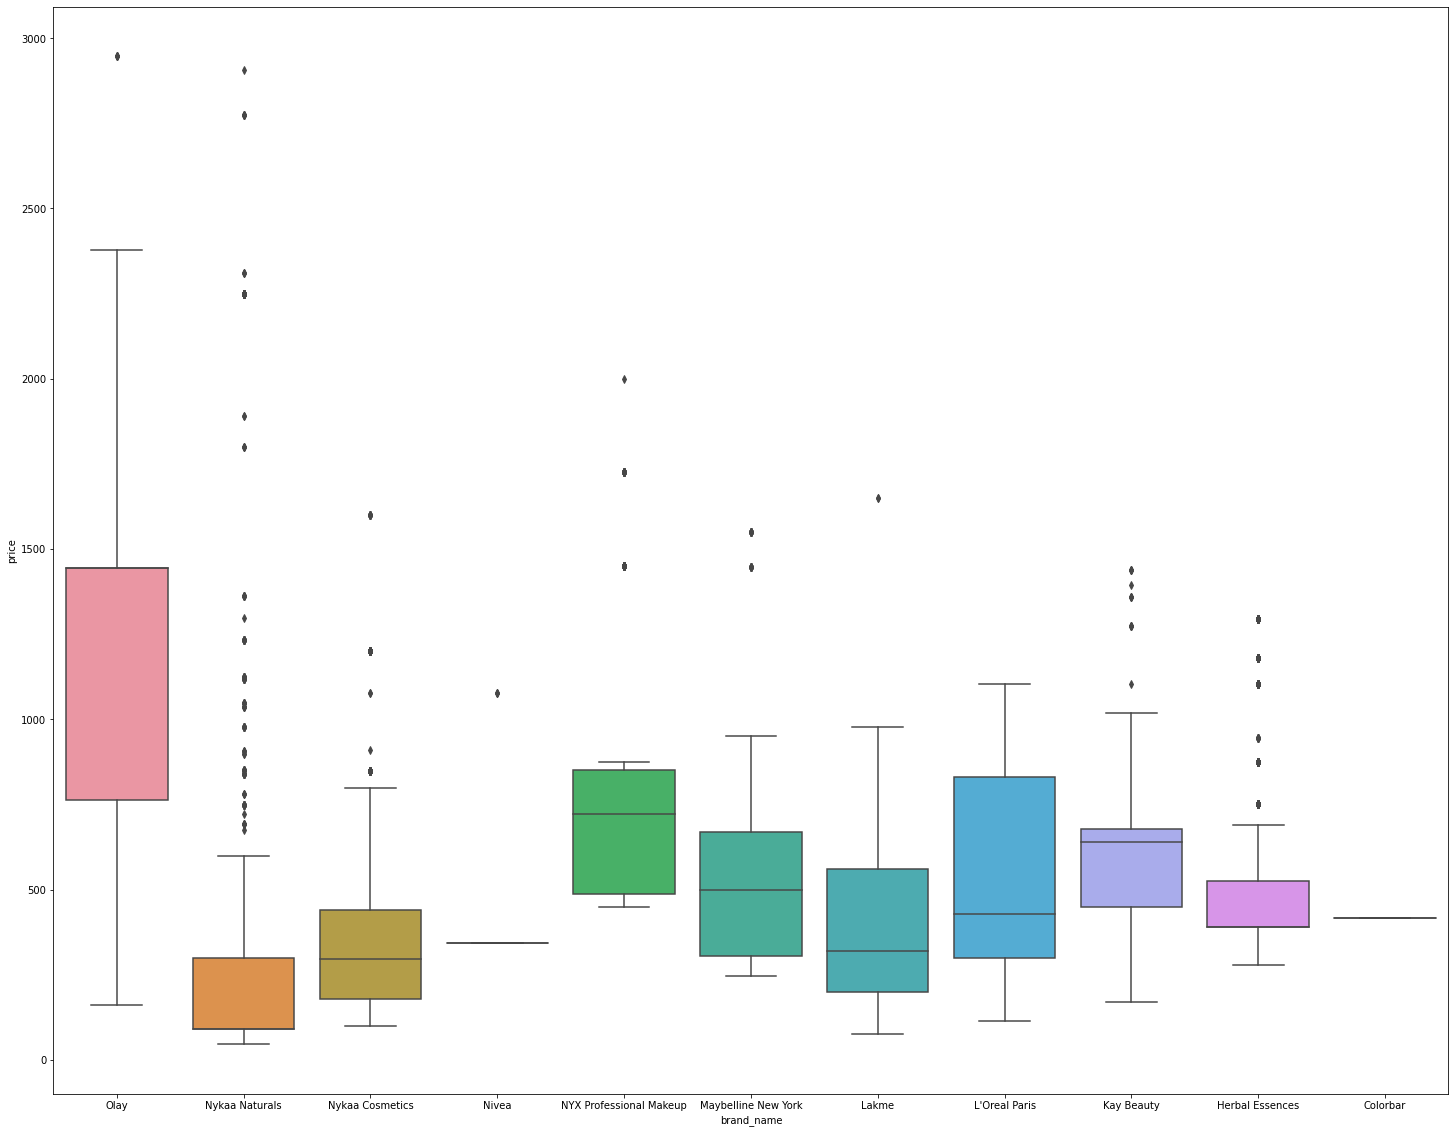

In [ ]:
plt.figure(figsize=(25,20))
sns.boxplot(x=df['brand_name'], y=df['price'])

This implies that brand Olay has the maximum price level having its minimum price more than 500 and maximum around 1500.

<Figure size 1800x1440 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


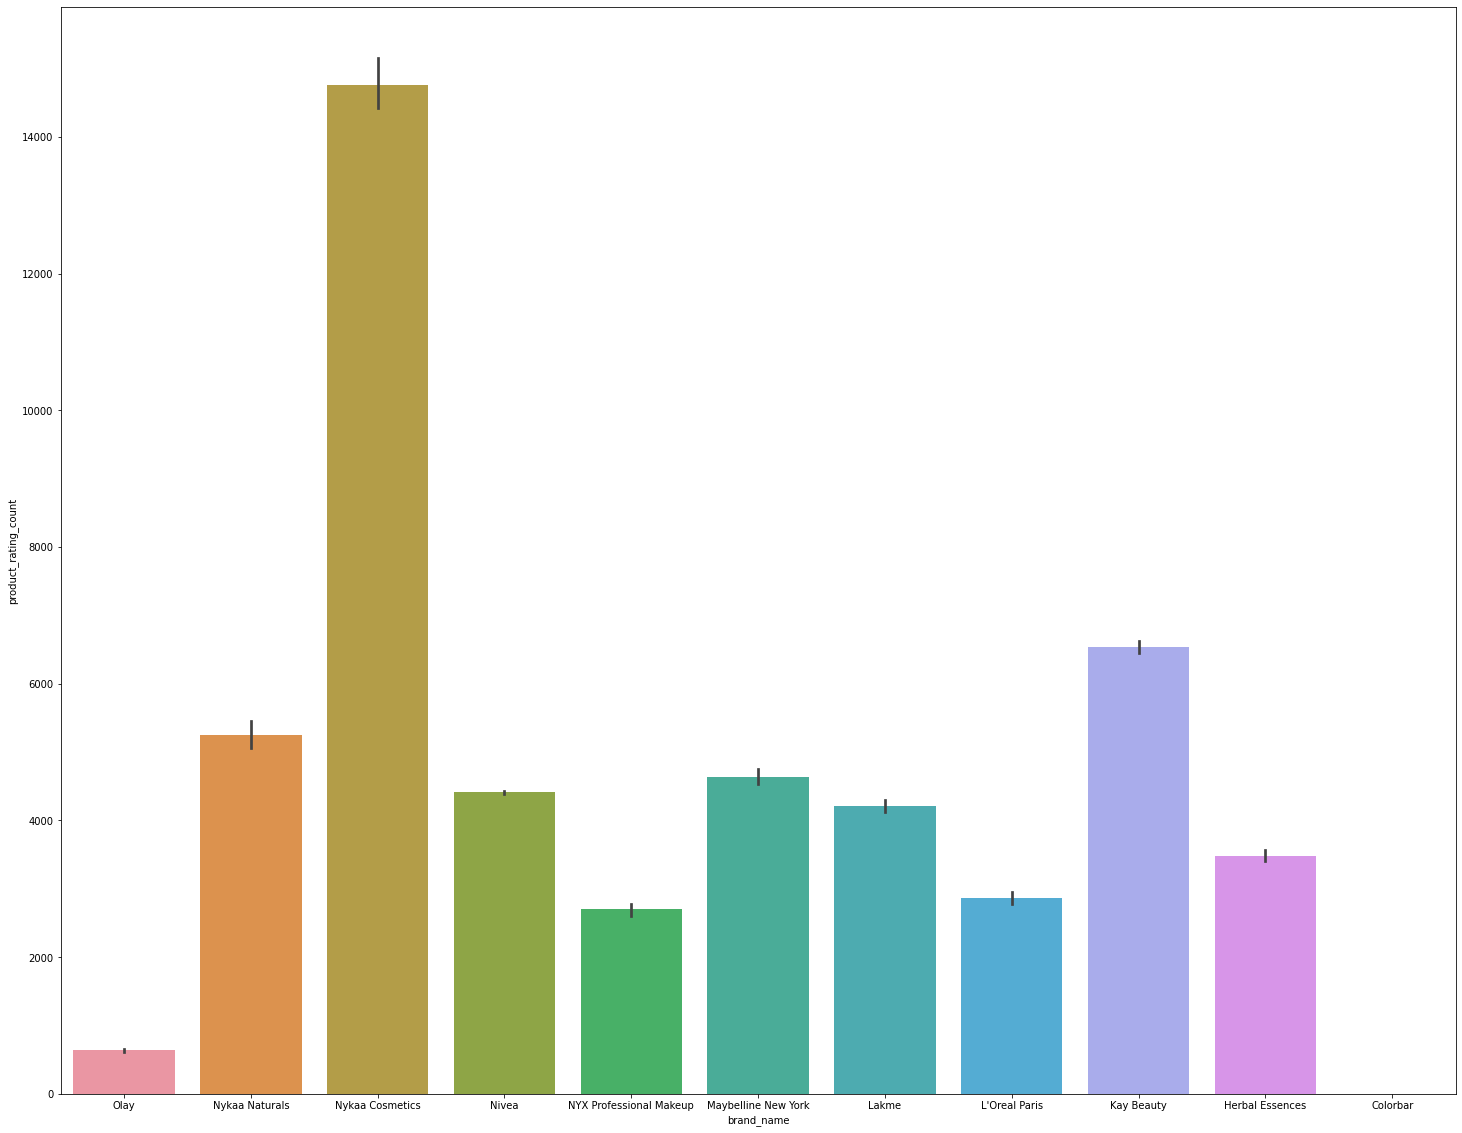

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(df["brand_name"],df["product_rating_count"])

This plot explains that brand Nykaa Cosmetics was reviewd by most most people as it has the highest product rating count.

<Figure size 1800x1440 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


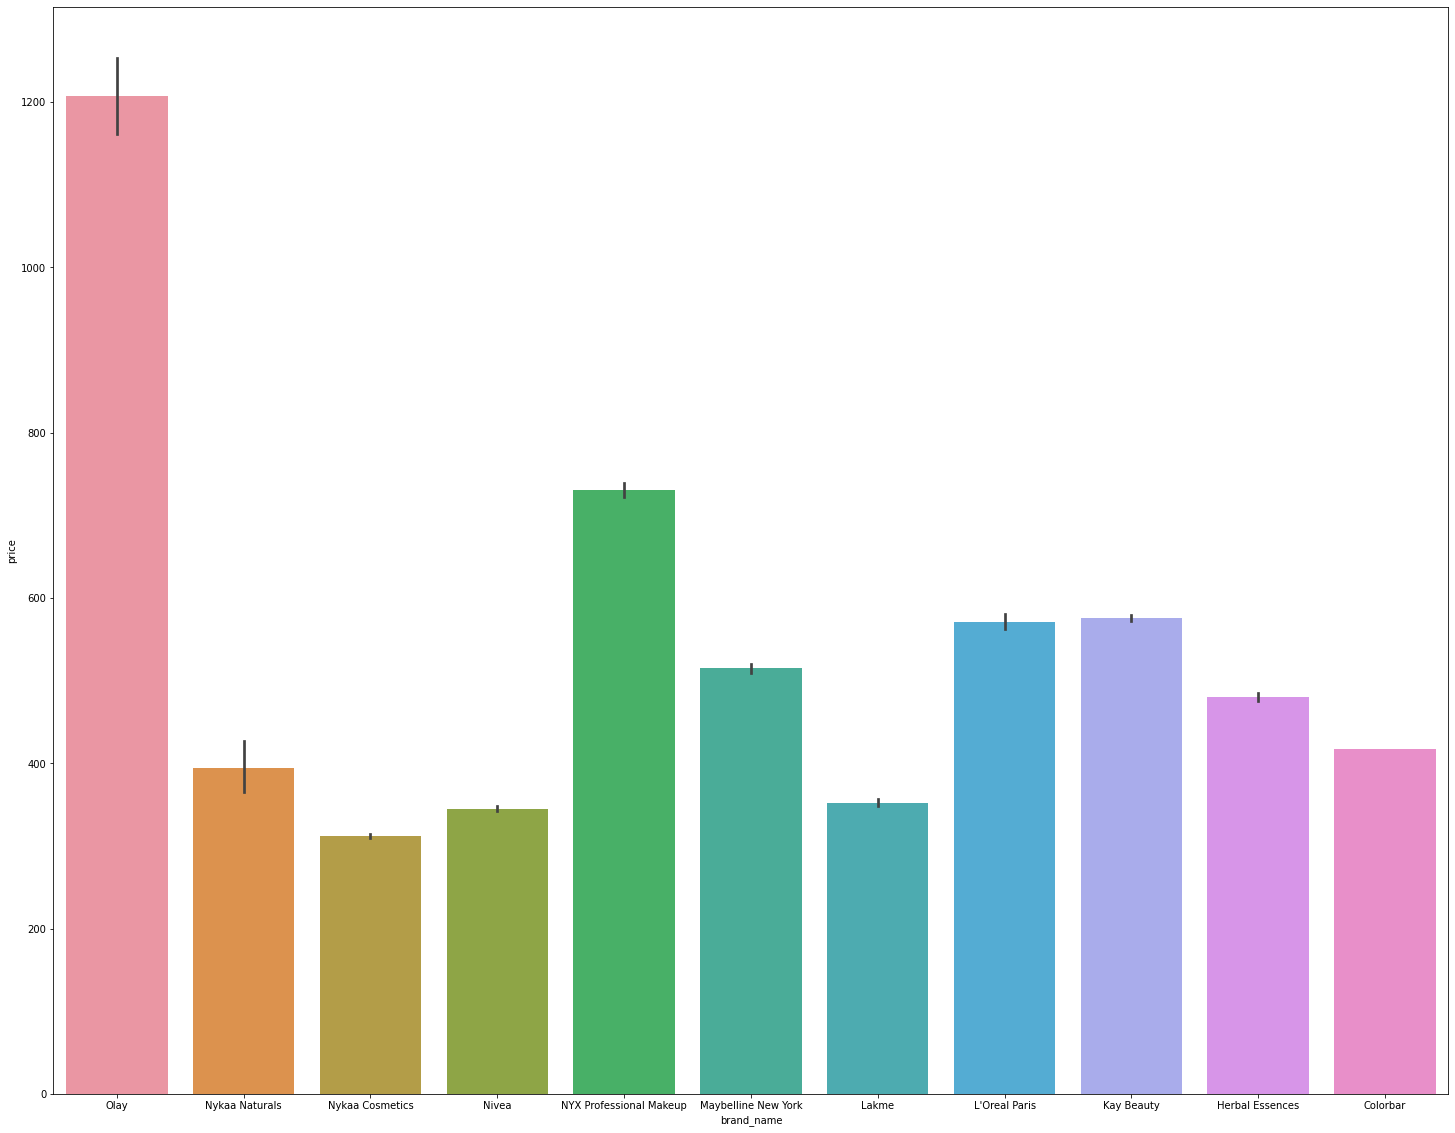

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(df["brand_name"],df["price"])

This plot implies that brand Olay is the costliest and brand Nykaa Cosmetics is the cheapest in price.

In [ ]:
df["Actual_price_diff"]= df["mrp"]-df["price"]

In [ ]:
df["Actual_price_diff"]

0        400
1        400
2        400
3        400
4        400
        ... 
61279    225
61280    225
61281    225
61282    225
61283    178
Name: Actual_price_diff, Length: 61283, dtype: int64

In [ ]:
df.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url,Actual_price_diff
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...,400
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...,400
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...,400
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...,400
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...,400


<Figure size 1800x1440 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


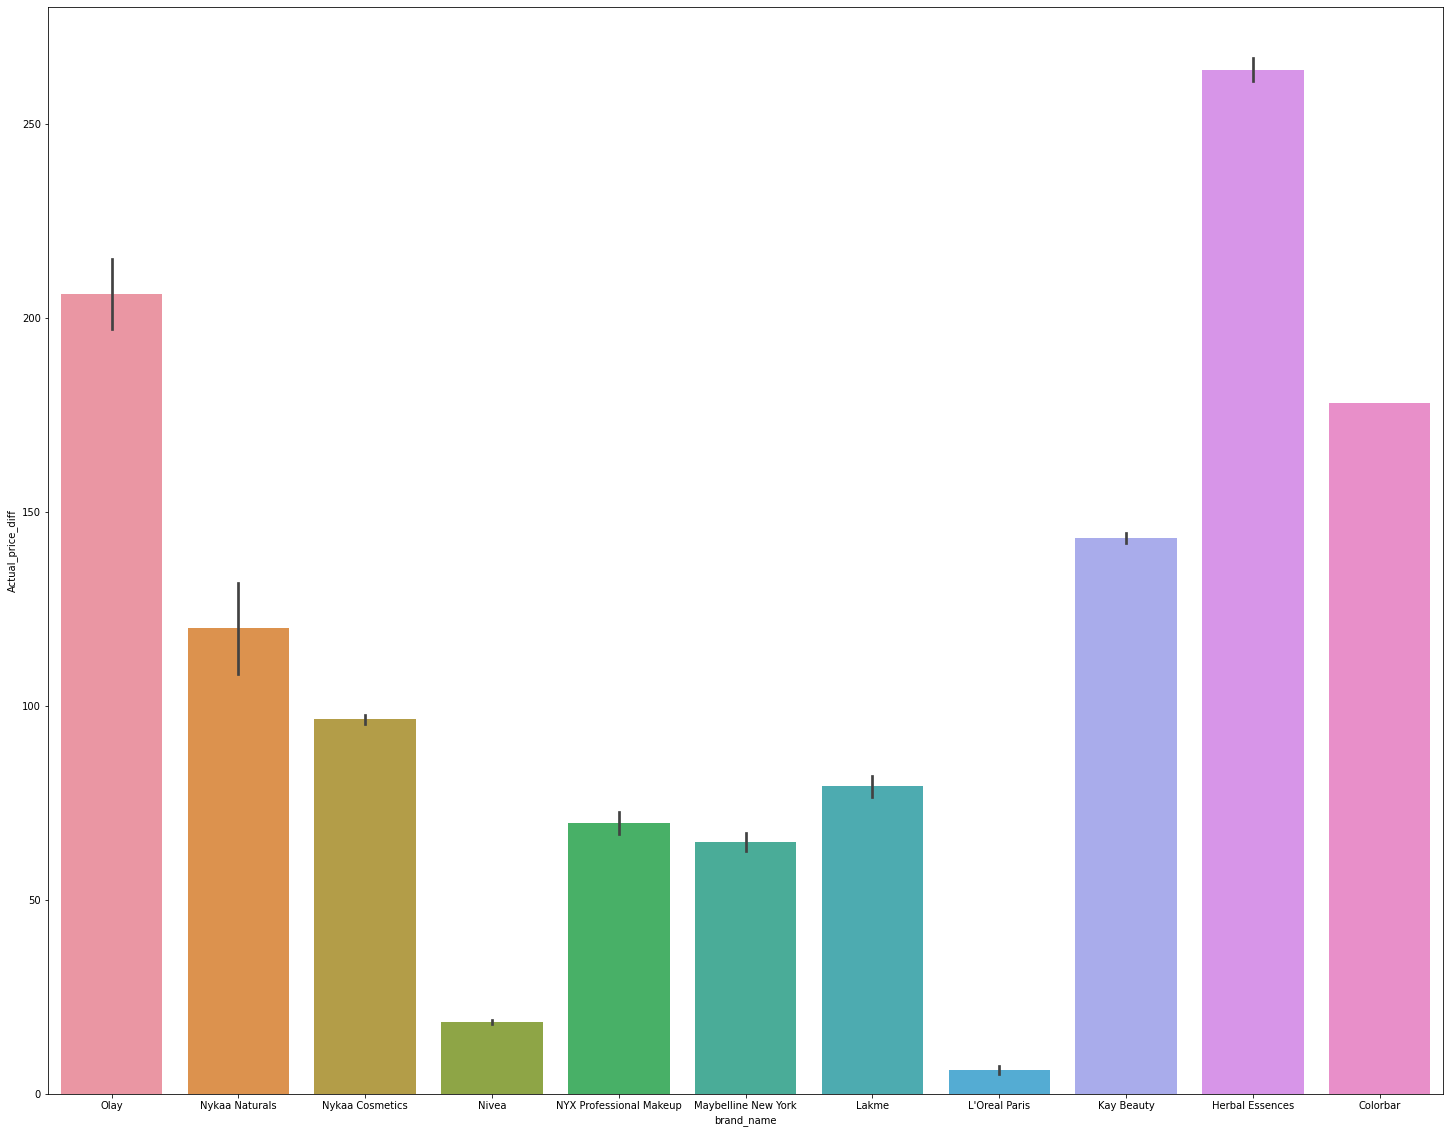

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(df["brand_name"],df["Actual_price_diff"])

This implies that brand Herbal Essences has given huge price discounts in comparison with the other brands.